In [94]:
def sig(x):
    return 1.0/(1+np.exp(-x))

In [95]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [96]:
x=[]
y=[]
for i in range(50):
    x.append(-i/10)
    x.append(i/10)
    y.append(sig(-i/10))
    y.append(sig(i/10))
    sorted(y)


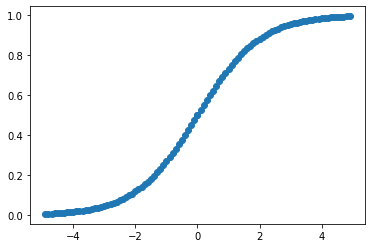

In [97]:
plt.scatter(x,y)
plt.show()

In [98]:
def lr_gd(X,y,n,α):
    k=np.shape(X)[1]#特征个数
    w=np.mat(np.ones((k,1)))#初始化权重
    i=0
    while i <= n:#迭代次数
        i+=1
        h=sig(X.dot(w))
        err=y-h
        w=w+α*X.T.dot(err)
    return w

In [99]:
def load_data(file_name):
    '''导入训练数据
    input:  file_name(string)训练数据的位置
    output: feature_data(mat)特征
            label_data(mat)标签
    '''
    f = open(file_name)  # 打开文件
    feature_data = []
    label_data = []
    for line in f.readlines():
        feature_tmp = []
        lable_tmp = []
        lines = line.strip().split("\t")
        feature_tmp.append(1)  # 偏置项
        for i in range(len(lines) - 1):
            feature_tmp.append(float(lines[i]))
        lable_tmp.append(float(lines[-1]))
        
        feature_data.append(feature_tmp)
        label_data.append(lable_tmp)
    f.close()  # 关闭文件
    return np.mat(feature_data), np.mat(label_data)


In [100]:
X,y=load_data("data.txt")

In [101]:
lr_gd(X,y,1000,0.01)

matrix([[ 1.39417775],
        [ 4.52717713],
        [-4.79398162]])

In [102]:
w=lr_gd(X,y,1000,0.01)

### 画图

In [103]:
x = np.linspace(0, 10, 200)
lr=(-w[0]-w[1]*x)/w[2]

x=x.reshape((200,1))
lr=lr.reshape((200,1))

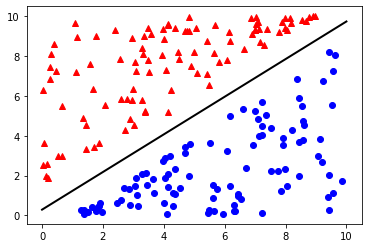

In [104]:
plt.plot(X[:,1][y==1],X[:,2][y==1],'bs' ,marker="o")
plt.plot(X[:,1][y==0],X[:,2][y==0],'rs', marker="^")
plt.plot(x1,lr,'k-',linewidth=2)